In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from simple_htm_gibbs import SimpleHTMGibbs

In [3]:
from sim_data import SimData

In [4]:
np.random.seed(1)

In [5]:
%%time
sim = SimData(num_leaves = 2, num_docs = 100, doc_length = 100, topic_sharpness = 20)
docs = sim.generate()

CPU times: user 247 ms, sys: 3.65 ms, total: 251 ms
Wall time: 255 ms


In [6]:
import os
import sys
sys.path.append(os.path.abspath(".."))
import text_utils

In [7]:
%%time
data, vocab = text_utils.document_strings_to_sparse_term_doc(
    docs = docs,
    tokenizer = text_utils.default_tokenizer,
    vocab = sim.vocab)

CPU times: user 238 ms, sys: 3.1 ms, total: 241 ms
Wall time: 243 ms


In [8]:
vocab

['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']

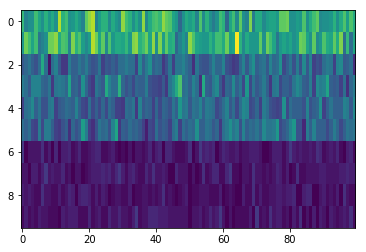

In [9]:
plt.imshow(data.todense(), aspect='auto');

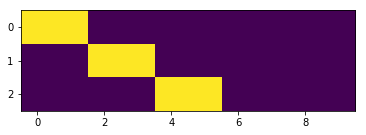

In [10]:
plt.imshow(sim.topics_by_index);

In [11]:
model = SimpleHTMGibbs(branching_factors=[sim.num_leaves], num_epochs=500, burn_in=0, lag=0)

In [12]:
model.fit(data)

100%|██████████| 500/500 [07:28<00:00,  1.11it/s]


In [13]:
print("Collected {} samples".format(len(model.stored_samples)))

Collected 500 samples


In [17]:
zzz = np.stack([model.stored_samples[i]["DV"] for i in range(len(model.stored_samples))])
zzz = zzz.mean(axis=0)
zzz /= zzz.sum(axis=-1, keepdims=True)
topic_vectors = zzz

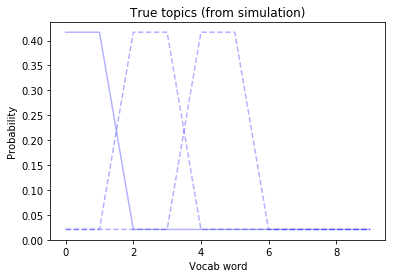

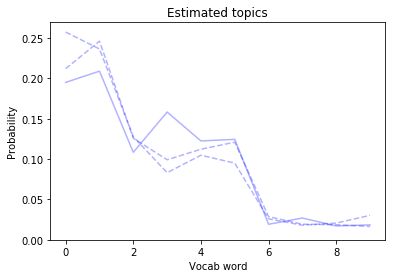

In [18]:
fig, ax = zip(*[plt.subplots() for i in range(2)])
for i in range(len(sim.nodes)):
    linestyle = '-' if i == 0 else '--'
    ax[0].plot(sim.topics_by_index[i,:], color='b', linestyle=linestyle, alpha=0.3)
    ax[1].plot(topic_vectors[i,:], color='b', linestyle=linestyle, alpha=0.3)
ax[0].set_title("True topics (from simulation)")
ax[1].set_title("Estimated topics")
for a in ax:
    a.set_xlabel("Vocab word")
    a.set_ylabel("Probability")
    a.set_ylim(0, None)
None